- Decision trees are nonlinear graphical models
- Unlike linear models that result in linear decision boundaries, decision trees partition the feature space into hyper-rectangular decision regions

### 7.1 A Mental Model for House Price Classification

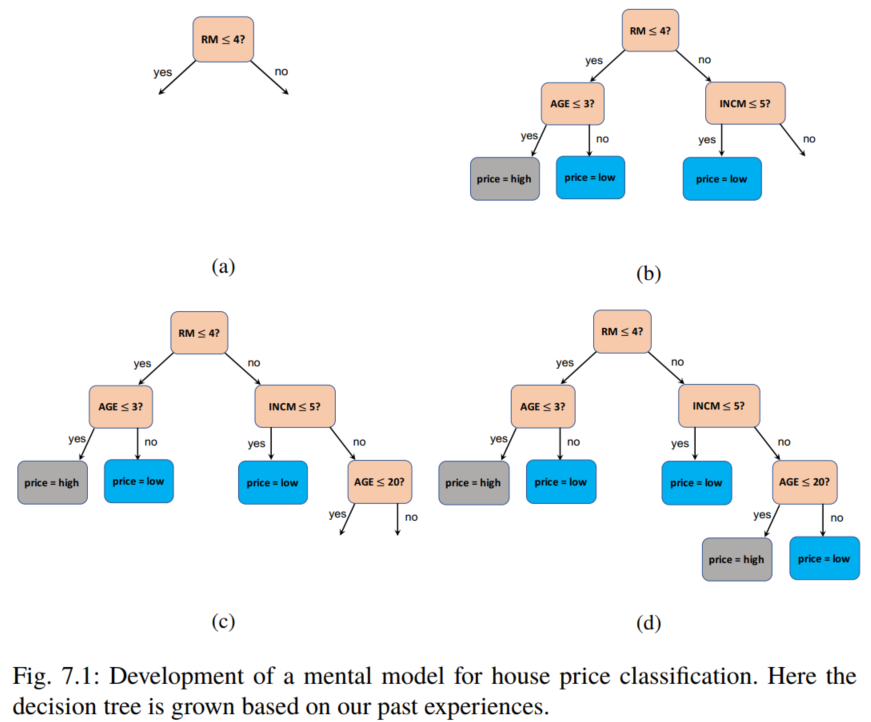

Continue growing the tree until all nodes are pure? It leads to overfitting

1. **Splitting node:** RM <= 4 is the first splitting node
2. **Impurity:** The split achieved by RM <= 4 is impure with respect to class labels. Even though RM <= 4 splits the data into two subsets, we cannot claim that all neighborhoods in each subset are entirely from one class
3. **Splitter**: find a splitting strategy, which is to identify the best split to minimize the impurity of data subsets
4. **Best split**: see above (splitting strategy)
5. **Maximum depth**: maximum number of links between the root node and any of the leaf nodes. It limits the both the number of leaf nodes and the total number of nodes
6. **Maximum leaf nodes**: it will limit the maximum depth and maximum number of nodes

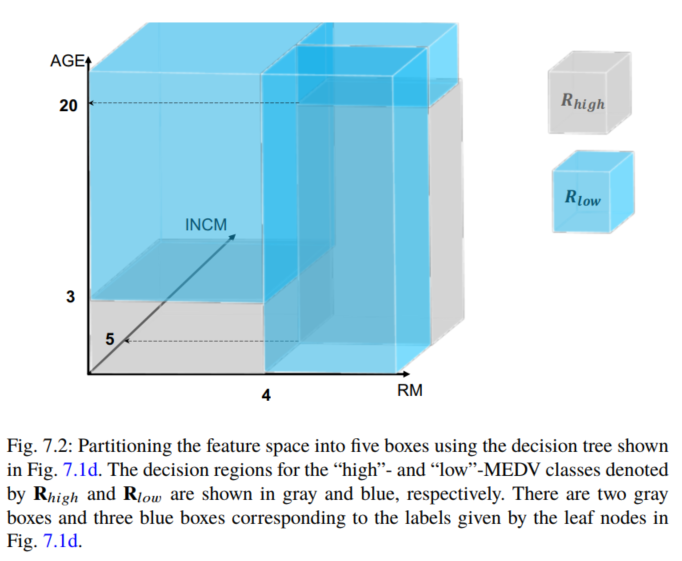

- Decision trees partition the feature space into hyper-rectangles
- Each box corresponds to a decision rule obtained by traversing from the root node to the leaf that includes the label for any observation falling into that rectangular region 

### 7.2 CART Development for Classification

#### 7.2.1 Splits

How CART splits data:
1. Numeric feature: $x_j \leq \theta ?$
2. Nominal feature: $x_j \in A ?$

As the split of the data is determined by the $j^\text{th}$ feature in the feature space and a threshold $\theta$:
- we refer to a split as $\xi = (j, \theta) \in \Xi$
- $\Xi$ denotes the set of all possible $\xi$ that create a unique split of data
- $\Theta_j$ denotes the set of candidate values of $\theta$ (halfways between consecutive values) for feature $x_j$

#### 7.2.2 Splitting Strategy

Assume the tree has already $m-1$ nodes, and we are looking for the best split at the $m^{th}$ node:
- Let $\mathbf{S}_{m} \subset \mathbf{S}_{tr}$ denote the training data availabel for the split at node $m$
- To identify the best spilt, we conduct an exhaustive search over $\Xi$ and identify the split that minimizes a measure of impurity
- $\mathbf{S}_{m}$ is then split into $\mathbf{S}^{\text{Yes}}_{m, \xi}$ and $\mathbf{S}^{\text{No}}_{m, \xi}$

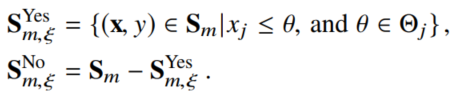

A common heuristic used to designate a split $\xi$ as the best split at node $m$ is to maximize the difference between the impurity of $\mathbf{S}_{m}$ and the weighted cumulative impurity of $\mathbf{S}^{\text{Yes}}_{m, \xi}$ and $\mathbf{S}^{\text{No}}_{m, \xi}$.

The impurity drop for a spilt $\xi$ at node $m$ is denoted as $\Delta_{m, \xi}$:

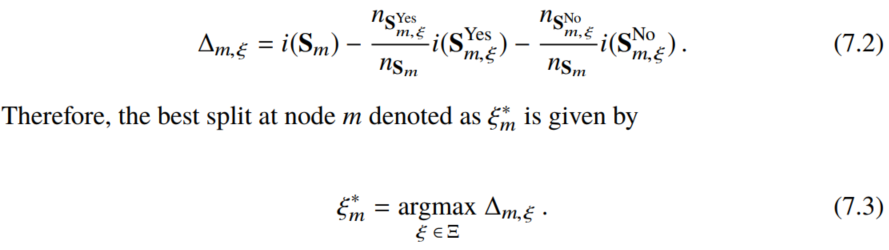

Once $\xi_m^*$ is found, we split the data and continue the process until a split-stopping criterion is met:
 
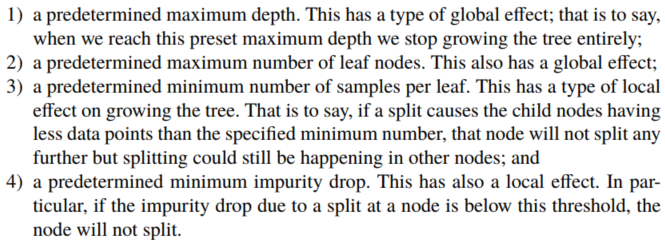

#### 7.2.3 Classification at Leaf Nodes

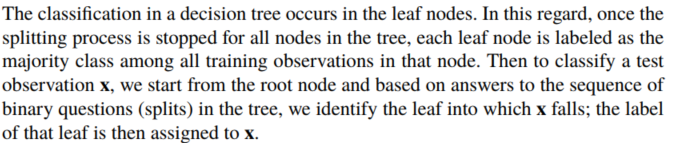

#### 7.2.4 Impurity Measures

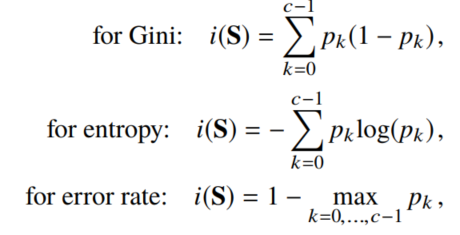

### 7.3 CART Development for Regression

#### 7.3.1 Differences Between Classification and Regression

1. The choices of impurity measures
2. How we estimate the target value at a leaf node

#### 7.3.2 Impurity Measures

In regression, once we designate a node as a leaf node, a trivial estimator that we can use as the estimate of the target value for any test observation falling into a leaf node is the mean target values of training data falling into that node.

Therefore a more "pure" node would be a node where the values of target for training data falling into that node are closer to their means

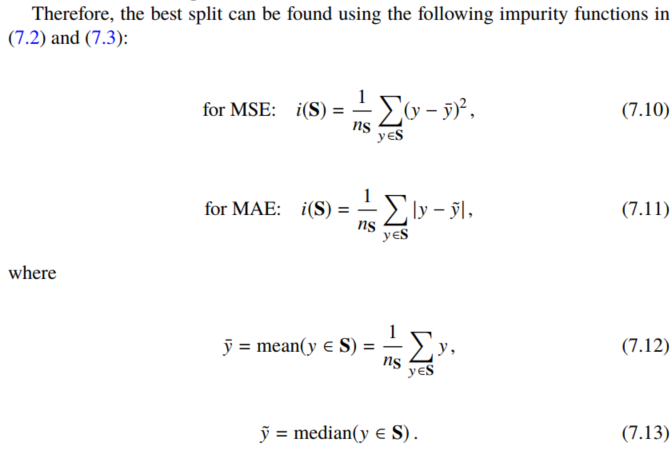

#### 7.3.3 Regression at Leaf Nodes

When (7.10) and (7.11) are used as impurity measures, the mean and median of
target values of training data in a leaf node are used, respectively, as the estimate of
targets for any observation falling into that node.

##### Example 7.2

X shape = (120, 2)
y shape = (120,)
X shape = (30, 2)
y shape = (30,)
The accuracy for min_samples_leaf=1 on the training data is 0.933
The accuracy for min_samples_leaf=1 on the test data is 0.667
The accuracy for min_samples_leaf=2 on the training data is 0.875
The accuracy for min_samples_leaf=2 on the test data is 0.667
The accuracy for min_samples_leaf=5 on the training data is 0.842
The accuracy for min_samples_leaf=5 on the test data is 0.667
The accuracy for min_samples_leaf=10 on the training data is 0.800
The accuracy for min_samples_leaf=10 on the test data is 0.567


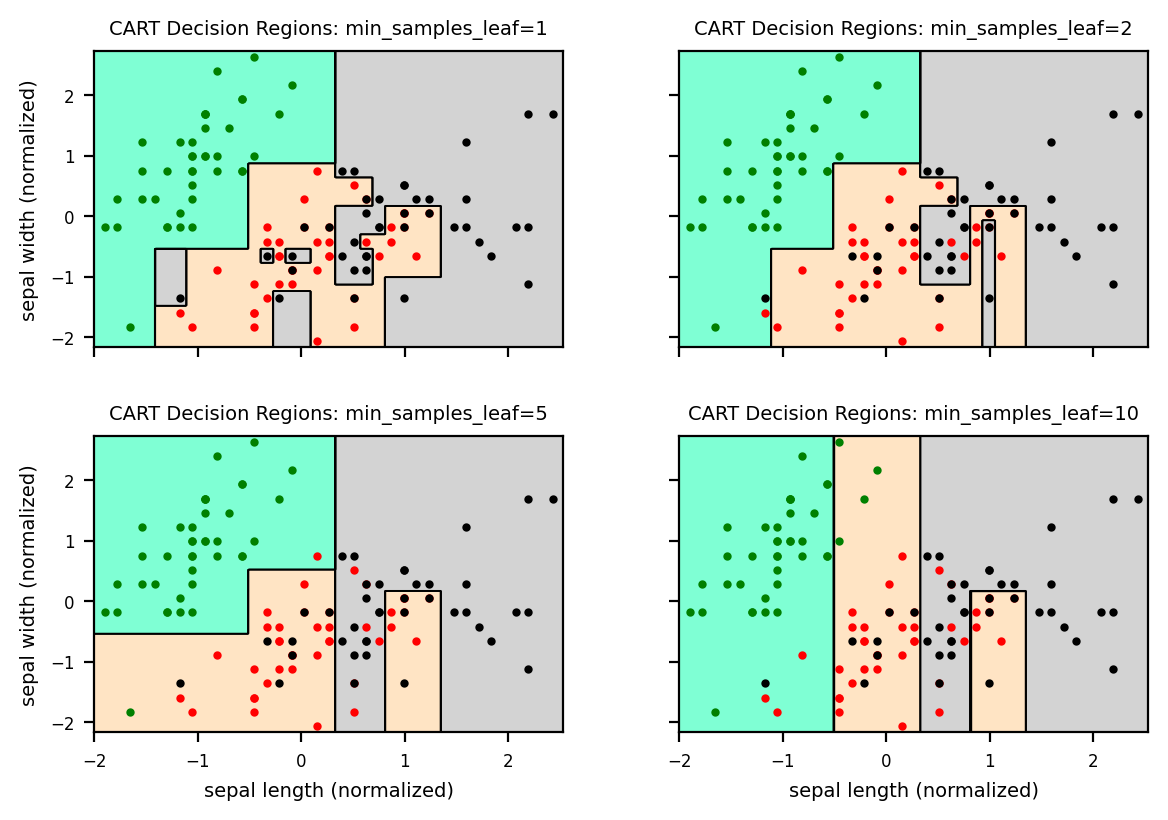

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier as CART

arrays = np.load('./data/iris_train_scaled.npz')
X_train = arrays['X']
y_train = arrays['y']
arrays = np.load('./data/iris_test_scaled.npz')
X_test = arrays['X']
y_test = arrays['y']
X_train = X_train[:,[0,1]]
X_test = X_test[:,[0,1]]
print('X shape = {}'.format(X_train.shape) + '\ny shape = {}'.format(y_train.shape))
print('X shape = {}'.format(X_test.shape) + '\ny shape = {}'.format(y_test.shape))
color = ('aquamarine', 'bisque', 'lightgrey')
cmap = ListedColormap(color)
mins = X_train.min(axis=0) - 0.1
maxs = X_train.max(axis=0) + 0.1
x = np.arange(mins[0], maxs[0], 0.01)
y = np.arange(mins[1], maxs[1], 0.01)
X, Y = np.meshgrid(x, y)
coordinates = np.array([X.ravel(), Y.ravel()]).T
fig, axs = plt.subplots(2, 2, figsize=(6, 4), dpi = 200)
fig.tight_layout()
min_samples_leaf_val = [1, 2, 5, 10]
for ax, msl in zip(axs.ravel(), min_samples_leaf_val):
  cart = CART(min_samples_leaf=msl)
  cart.fit(X_train, y_train)
  Z = cart.predict(coordinates)
  Z = Z.reshape(X.shape)
  ax.tick_params(axis='both', labelsize=6)
  ax.set_title('CART Decision Regions: min_samples_leaf=' + str(msl), fontsize=7)
  ax.pcolormesh(X, Y, Z, cmap = cmap, shading='nearest')
  ax.contour(X ,Y, Z, colors='black', linewidths=0.5)
  ax.plot(X_train[y_train==0, 0], X_train[y_train==0, 1],'g.', markersize=4)
  ax.plot(X_train[y_train==1, 0], X_train[y_train==1, 1],'r.', markersize=4)
  ax.plot(X_train[y_train==2, 0], X_train[y_train==2, 1],'k.', markersize=4)
  ax.set_xlabel('sepal length (normalized)', fontsize=7)
  ax.set_ylabel('sepal width (normalized)', fontsize=7)
  print('The accuracy for min_samples_leaf={} on the training data is {:.3f}'.format(msl, cart.score(X_train, y_train)))
  print('The accuracy for min_samples_leaf={} on the test data is {:.3f}'.format(msl, cart.score(X_test, y_test)))
for ax in axs.ravel():
  ax.label_outer()

### 7.4 Interpretability of Decision Trees

[Text(0.4090909090909091, 0.9166666666666666, 'sepal length (cm) <= -0.514\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.18181818181818182, 0.75, 'sepal width (cm) <= -0.068\ngini = 0.184\nsamples = 40\nvalue = [36, 3, 1]\nclass = setosa'),
 Text(0.29545454545454547, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.512\nsamples = 11\nvalue = [7, 3, 1]\nclass = setosa'),
 Text(0.2727272727272727, 0.5833333333333334, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]\nclass = setosa'),
 Text(0.6363636363636364, 0.75, 'sepal length (cm) <= 0.328\ngini = 0.546\nsamples = 80\nvalue = [4, 37, 39]\nclass = virginica'),
 Text(0.5227272727272727, 0.8333333333333333, '  False'),
 Text(0.45454545454545453, 0.5833333333333334, 'sepal width (cm) <= -0.303\ngini = 0.457\nsamples = 34\nvalue = [4, 24, 6]\nclass = versicolor'),
 Text(0.36363636363636365, 0.4166666666666667, 'sepal width (cm) <= -0.773\ngini = 0.287\nsamples = 23\nvalue 

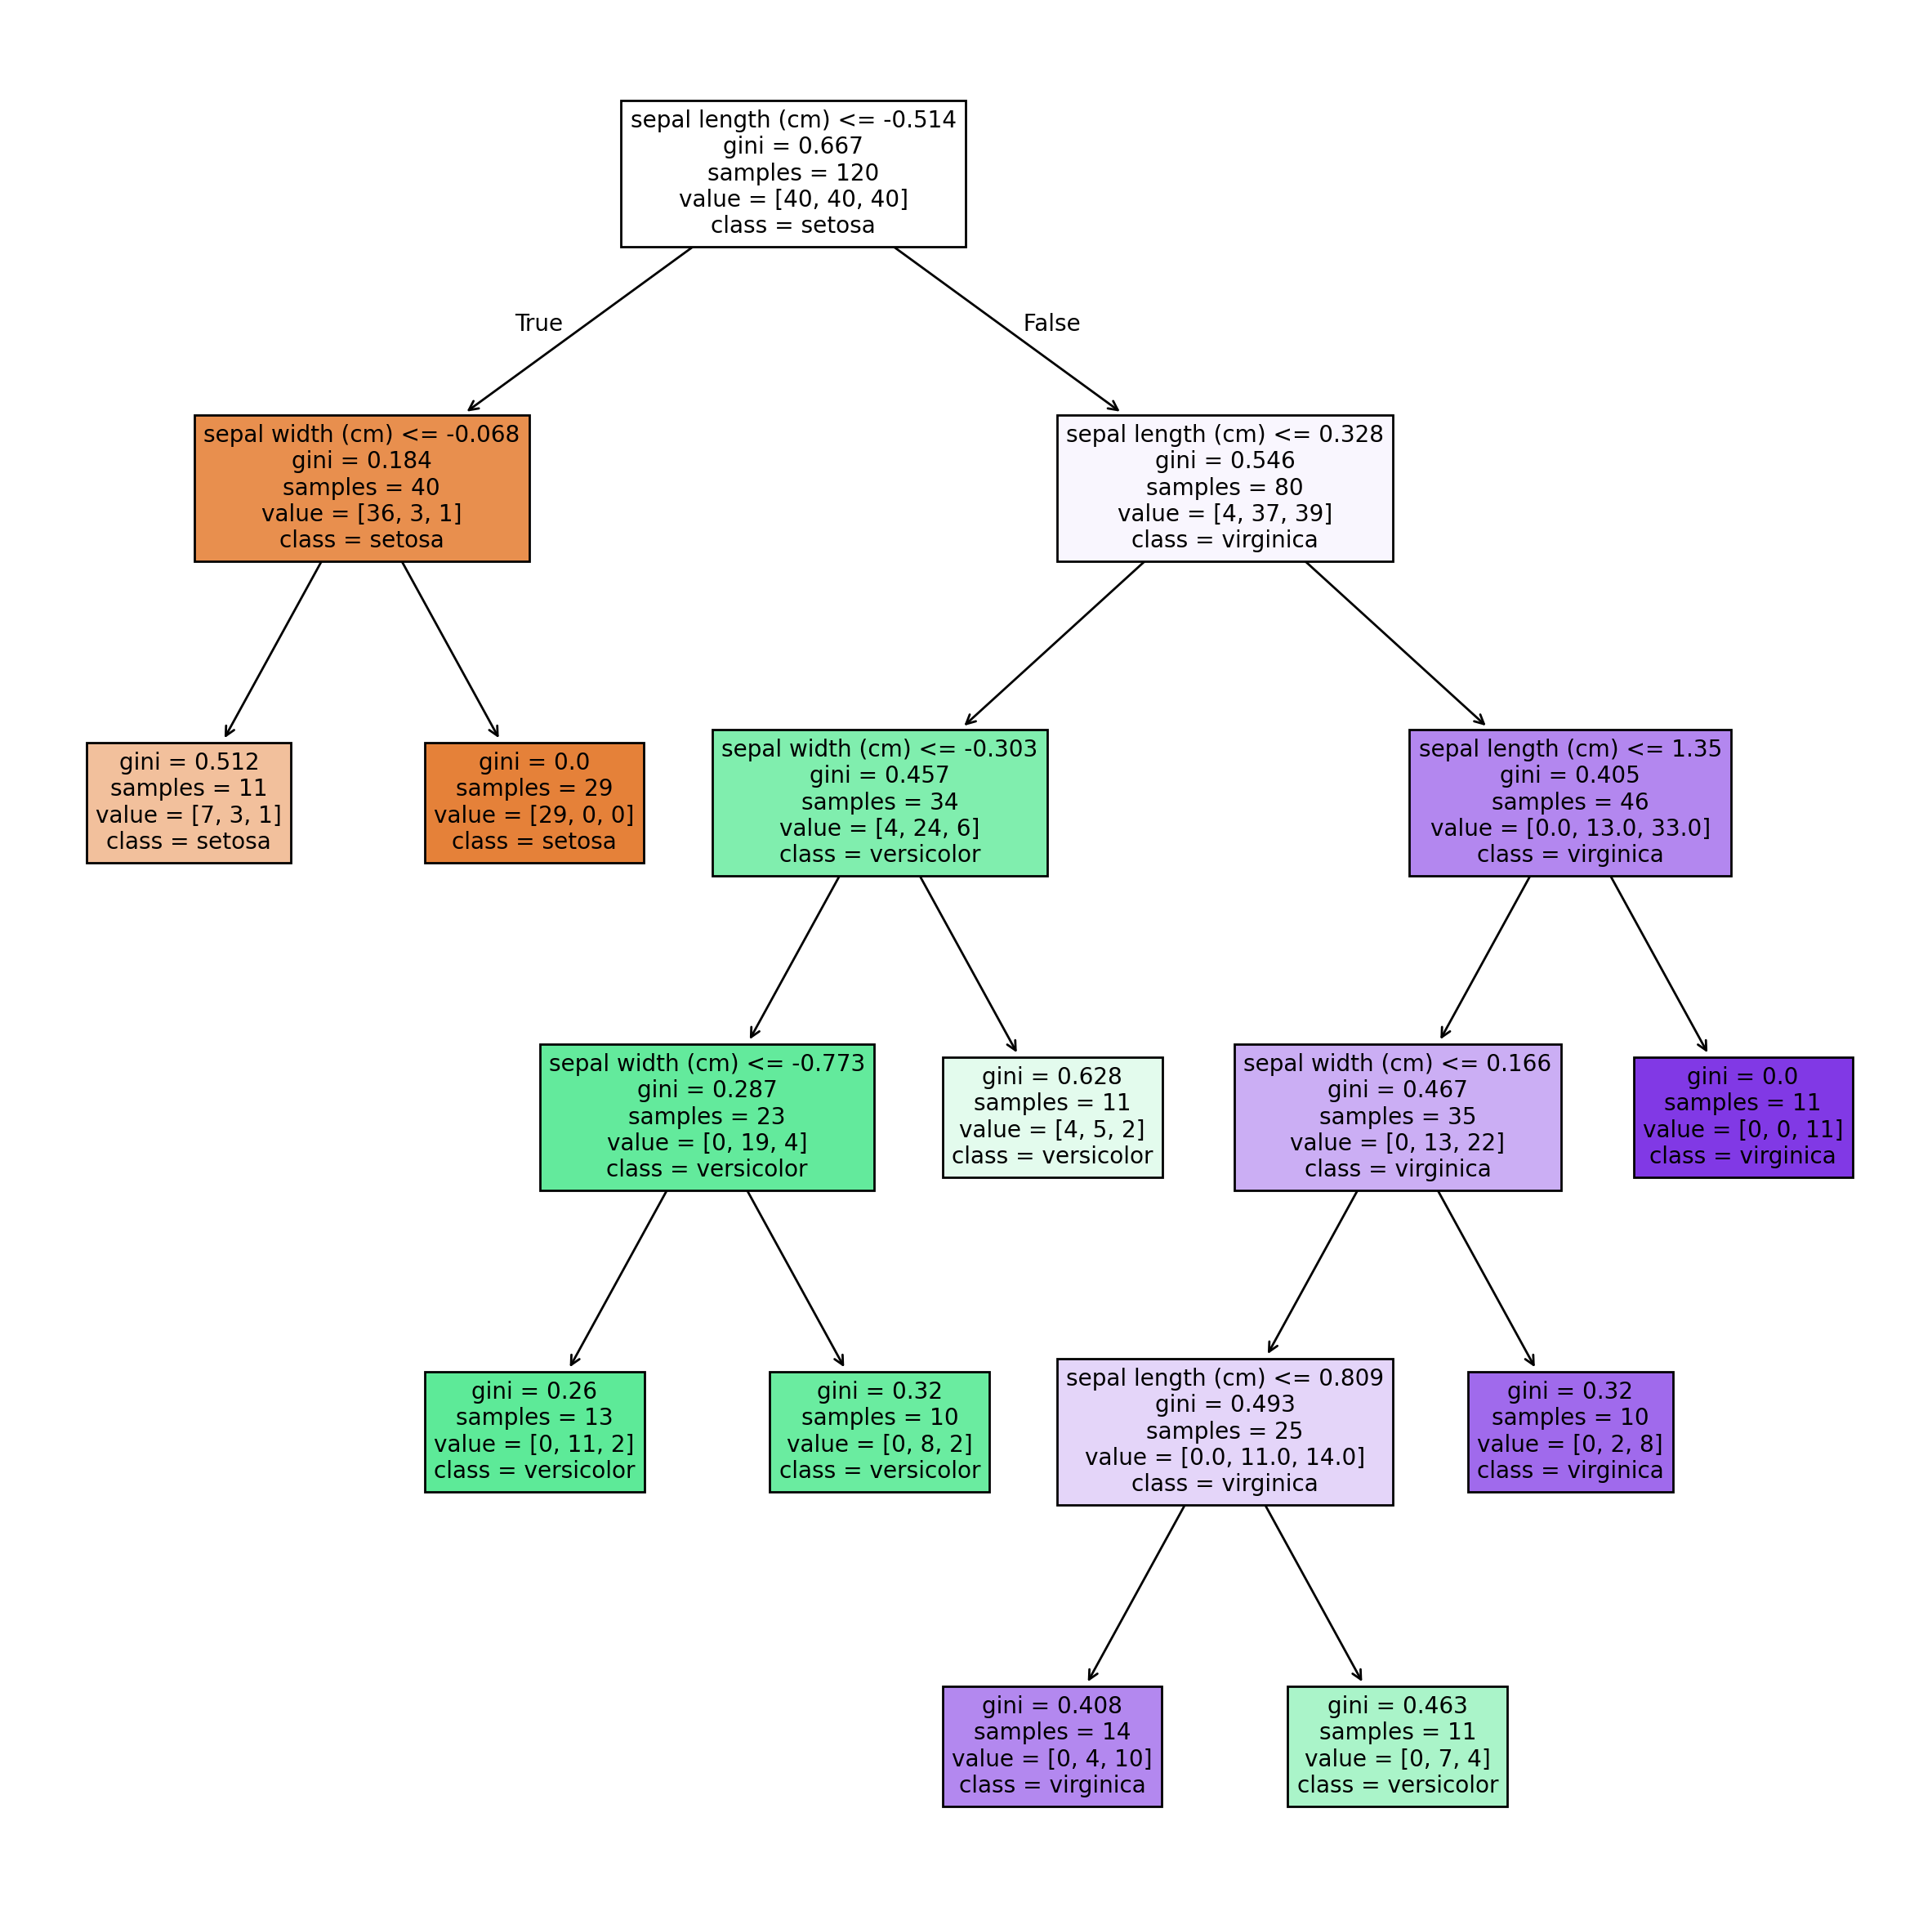

In [5]:
from sklearn import datasets
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15), dpi=200)
iris = datasets.load_iris()
plot_tree(cart, feature_names = iris.feature_names[0:2], class_names=iris.target_names[0:3], filled=True)